In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
import rasterio

In [4]:
Chch_ds = xr.open_dataset("/home/UOCNT/jco166/Assignment_3/Ch_dataset.nc")

In [3]:
Chch_ds

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 237117)
Coordinates:
  * geometry           (geometry) object '0101000000AB9509BFD495654040FB91223...
  * height             (height) float32 2.0
  * time               (time) datetime64[ns] 1996-07-12T12:00:00 ... 2023-10-...
Data variables:
    externalId         (geometry) object ...
    lat                (geometry) float64 ...
    lon                (geometry) float64 ...
    name               (geometry) object ...
    ref                (geometry) object ...
    station_id         (geometry) object ...
    wind_speed         (geometry, height, time) float32 ...
    wind_direction     (time, geometry, height) float32 ...
    temperature        (geometry, height, time) float32 ...
    relative_humidity  (geometry, height, time) float32 ...
    precipitation      (geometry, height, time) float32 ...
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

In [5]:
CWS = Chch_ds['wind_speed']
CWD = Chch_ds['wind_direction']
CAT = Chch_ds['temperature']
CRH = Chch_ds['relative_humidity']
CP = Chch_ds['precipitation']

In [7]:
first_time_CWS = Chch_ds['wind_speed'].time.values[0]
end_time_CWS = Chch_ds['wind_speed'].time.values[-1]

first_time_CWD = Chch_ds['wind_direction'].time.values[0]
end_time_CWD = Chch_ds['wind_direction'].time.values[-1]

first_time_CAT = Chch_ds['temperature'].time.values[0]
end_time_CAT = Chch_ds['temperature'].time.values[-1]

first_time_CRH = Chch_ds['relative_humidity'].time.values[0]
end_time_CRH = Chch_ds['relative_humidity'].time.values[-1]

first_time_CP = Chch_ds['precipitation'].time.values[0]
end_time_CP = Chch_ds['precipitation'].time.values[-1]

In [8]:
print(first_time_CWS)
print(end_time_CWS)

print(first_time_CWD)
print(end_time_CWD)

print(first_time_CAT)
print(first_time_CAT)

print(first_time_CRH)
print(end_time_CRH)

print(first_time_CP)
print(end_time_CP)

1996-07-12T12:00:00.000000000
2023-10-17T18:00:00.000000000
1996-07-12T12:00:00.000000000
2023-10-17T18:00:00.000000000
1996-07-12T12:00:00.000000000
1996-07-12T12:00:00.000000000
1996-07-12T12:00:00.000000000
2023-10-17T18:00:00.000000000
1996-07-12T12:00:00.000000000
2023-10-17T18:00:00.000000000


In [6]:
WtM_Cds = Chch_ds.sel(time=slice("2023-10-11","2023-10-16"))

In [7]:
WtM_Cds

<xarray.Dataset>
Dimensions:            (geometry: 1, height: 1, time: 144)
Coordinates:
  * geometry           (geometry) object '0101000000AB9509BFD495654040FB91223...
  * height             (height) float32 2.0
  * time               (time) datetime64[ns] 2023-10-11 ... 2023-10-16T23:00:00
Data variables:
    externalId         (geometry) object ...
    lat                (geometry) float64 ...
    lon                (geometry) float64 ...
    name               (geometry) object ...
    ref                (geometry) object ...
    station_id         (geometry) object ...
    wind_speed         (geometry, height, time) float32 ...
    wind_direction     (time, geometry, height) float32 ...
    temperature        (geometry, height, time) float32 ...
    relative_humidity  (geometry, height, time) float32 ...
    precipitation      (geometry, height, time) float32 ...
Attributes:
    result_type:     time_series
    title:           mean wind_speed in m/s of the atmosphere by a sensor_rec...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

In [8]:
WtM_CWS = WtM_Cds['wind_speed']
WtM_CWD = WtM_Cds['wind_direction']
WtM_CAT = WtM_Cds['temperature']
WtM_CRH = WtM_Cds['relative_humidity']
WtM_CP = WtM_Cds['precipitation']

In [9]:
first_time_WtM_CWS = WtM_Cds['wind_speed'].time.values[0]
end_time_WtM_CWS = WtM_Cds['wind_speed'].time.values[-1]

first_time_WtM_CWD = WtM_Cds['wind_direction'].time.values[0]
end_time_WtM_CWD = WtM_Cds['wind_direction'].time.values[-1]

first_time_WtM_CAT = WtM_Cds['temperature'].time.values[0]
end_time_WtM_CAT = WtM_Cds['temperature'].time.values[-1]

first_time_WtM_CRH = WtM_Cds['relative_humidity'].time.values[0]
end_time_WtM_CRH = WtM_Cds['relative_humidity'].time.values[-1]

first_time_WtM_CP = WtM_Cds['precipitation'].time.values[0]
end_time_WtM_CP = WtM_Cds['precipitation'].time.values[-1]

In [10]:
print(first_time_WtM_CWS)
print(end_time_WtM_CWS)

print(first_time_WtM_CWD)
print(end_time_WtM_CWD)

print(first_time_WtM_CAT)
print(end_time_WtM_CAT)

print(first_time_WtM_CRH)
print(end_time_WtM_CRH)

print(first_time_WtM_CP)
print(end_time_WtM_CP)

2023-10-11T00:00:00.000000000
2023-10-16T23:00:00.000000000
2023-10-11T00:00:00.000000000
2023-10-16T23:00:00.000000000
2023-10-11T00:00:00.000000000
2023-10-16T23:00:00.000000000
2023-10-11T00:00:00.000000000
2023-10-16T23:00:00.000000000
2023-10-11T00:00:00.000000000
2023-10-16T23:00:00.000000000


In [12]:
WtM_CWS_grp_hrly = WtM_Cds.wind_speed.groupby("time.hour").mean(dim="time")
WtM_CWD_grp_hrly = WtM_Cds.wind_direction.groupby("time.hour").mean(dim="time")
WtM_CAT_grp_hrly = WtM_Cds.temperature.groupby("time.hour").mean(dim="time")
WtM_CRH_grp_hrly = WtM_Cds.relative_humidity.groupby("time.hour").mean(dim="time")
WtM_CP_grp_hrly = WtM_Cds.precipitation.groupby("time.hour").mean(dim="time")

In [15]:
WtM_CWS_grp_hrly_val = WtM_CWS_grp_hrly.hour
WtM_CWS_grp_hrly_mean = WtM_CWS_grp_hrly.values

WtM_CWD_grp_hrly_val = WtM_CWD_grp_hrly.hour
WtM_CWD_grp_hrly_mean = WtM_CWD_grp_hrly.values

WtM_CAT_grp_hrly_val = WtM_CAT_grp_hrly.hour
WtM_CAT_grp_hrly_mean = WtM_CAT_grp_hrly.values

WtM_CRH_grp_hrly_val = WtM_CRH_grp_hrly.hour
WtM_CRH_grp_hrly_mean = WtM_CRH_grp_hrly.values

WtM_CP_grp_hrly_val = WtM_CP_grp_hrly.hour
WtM_CP_grp_hrly_mean = WtM_CP_grp_hrly.values

In [75]:
import numpy as np
WtM_CWS_grp_hrly_val = np.array(WtM_CWS_grp_hrly_val)
WtM_CWS_grp_hrly_mean = np.array(WtM_CWS_grp_hrly_mean)

WtM_CWS_grp_hrly_mean_re = WtM_CWS_grp_hrly_mean.reshape(24)

In [51]:
import numpy as np

WtM_CWD_grp_hrly_mean_re = WtM_CWD_grp_hrly_mean.reshape(24)

In [53]:
import numpy as np

WtM_CAT_grp_hrly_mean_re = WtM_CAT_grp_hrly_mean.reshape(24)

In [58]:
import numpy as np

WtM_CRH_grp_hrly_mean_re = WtM_CRH_grp_hrly_mean.reshape(24)

In [65]:
import numpy as np

WtM_CP_grp_hrly_mean_re = WtM_CP_grp_hrly_mean.reshape(24)

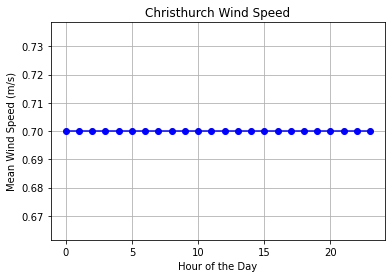

In [89]:
plt.plot(WtM_CWS_grp_hrly_val, WtM_CWS_grp_hrly_mean_re, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Wind Speed (m/s)")
plt.title("Christhurch Wind Speed")

# Display
plt.grid(True)
plt.show()

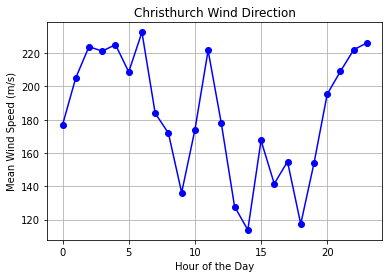

In [52]:
plt.plot(WtM_CWD_grp_hrly_val, WtM_CWD_grp_hrly_mean_re, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Wind Direction (degrees)")
plt.title("Christhurch Wind Direction")

# Display
plt.grid(True)
plt.show()

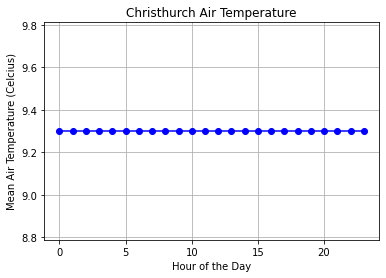

In [88]:
plt.plot(WtM_CAT_grp_hrly_val, WtM_CAT_grp_hrly_mean_re, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Air Temperature (Celcius)")
plt.title("Christhurch Air Temperature")

# Display
plt.grid(True)
plt.show()

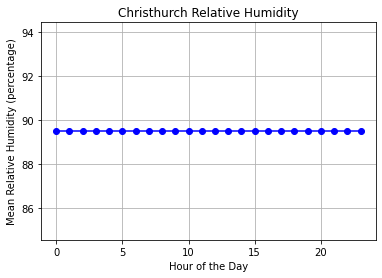

In [87]:
plt.plot(WtM_CRH_grp_hrly_val, WtM_CRH_grp_hrly_mean_re, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Relative Humidity (percentage)")
plt.title("Christhurch Relative Humidity")

# Display
plt.grid(True)
plt.show()

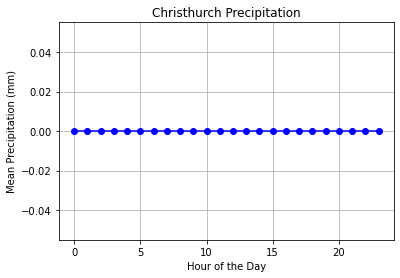

In [84]:
plt.plot(WtM_CP_grp_hrly_val, WtM_CP_grp_hrly_mean_re, marker="o", linestyle="-", color="blue")

# Creating a Line Plot with a Title and Labels
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Precipitation (mm)")
plt.title("Christhurch Precipitation")

# Display
plt.grid(True)
plt.show()

Text(0, 0.5, 'Wind Speed (m/s)')

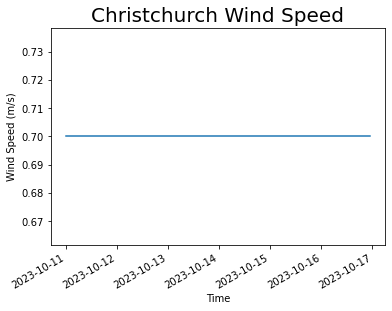

In [95]:
WtM_Cds.wind_speed.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Christchurch Wind Speed",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")

Text(0, 0.5, 'Wind Direction (degrees)')

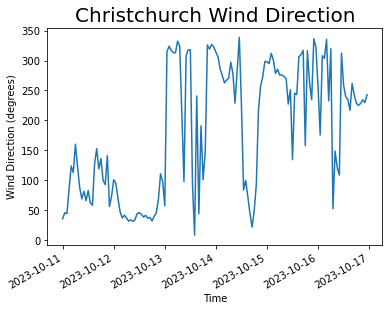

In [99]:
WtM_Cds.wind_direction.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Christchurch Wind Direction",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Wind Direction (degrees)")

Text(0, 0.5, 'Air Temperature (Celsius)')

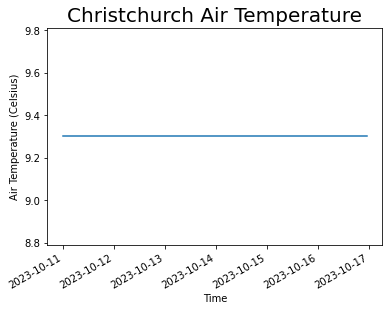

In [96]:
WtM_Cds.temperature.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Christchurch Air Temperature",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Air Temperature (Celsius)")

Text(0, 0.5, 'Relative Humidity (percentage)')

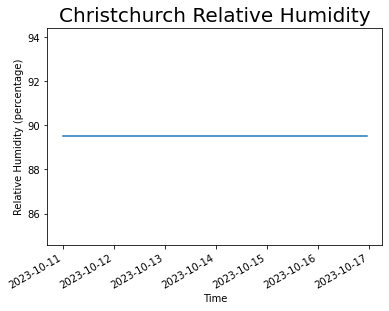

In [97]:
WtM_Cds.relative_humidity.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Christchurch Relative Humidity",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Relative Humidity (percentage)")

Text(0, 0.5, 'Precipitation (mm)')

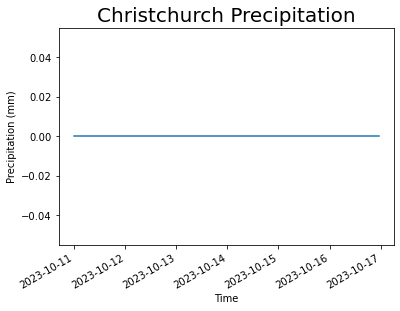

In [98]:
WtM_Cds.precipitation.isel(geometry=0,height=0,time=range(0,144)).plot()
plt.title("Christchurch Precipitation",fontsize=20)
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")